In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("../DATA/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<AxesSubplot:xlabel='sex', ylabel='count'>

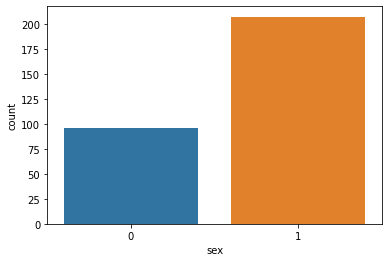

In [5]:
sns.countplot(x='sex', data=df)

<AxesSubplot:xlabel='target', ylabel='count'>

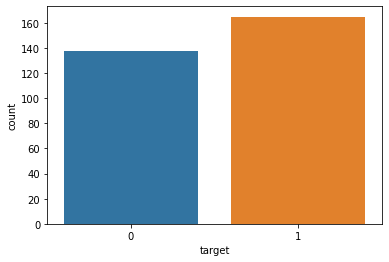

In [6]:
sns.countplot(x='target', data=df)

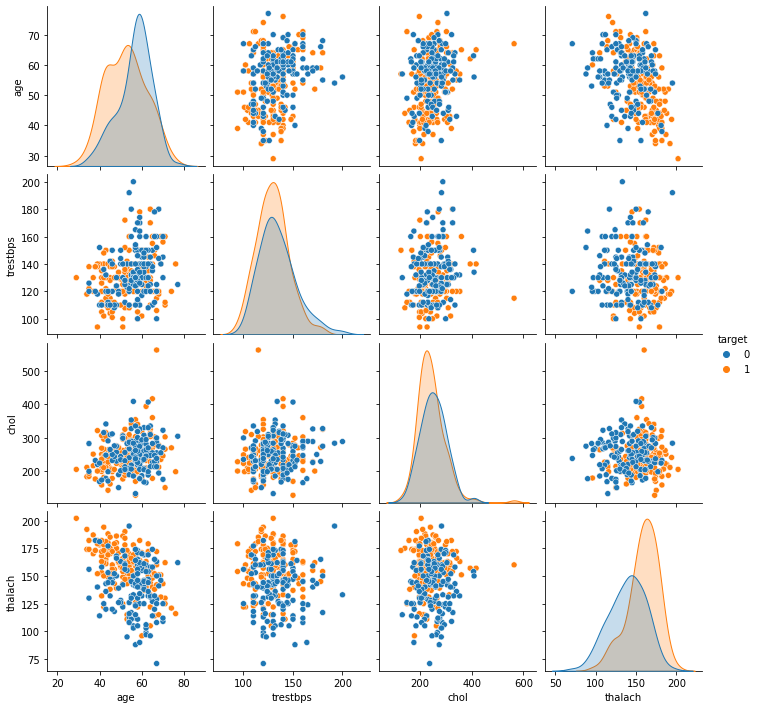

In [7]:
sns.pairplot(df[['age','trestbps', 'chol','thalach','target']],hue='target')

<AxesSubplot:>

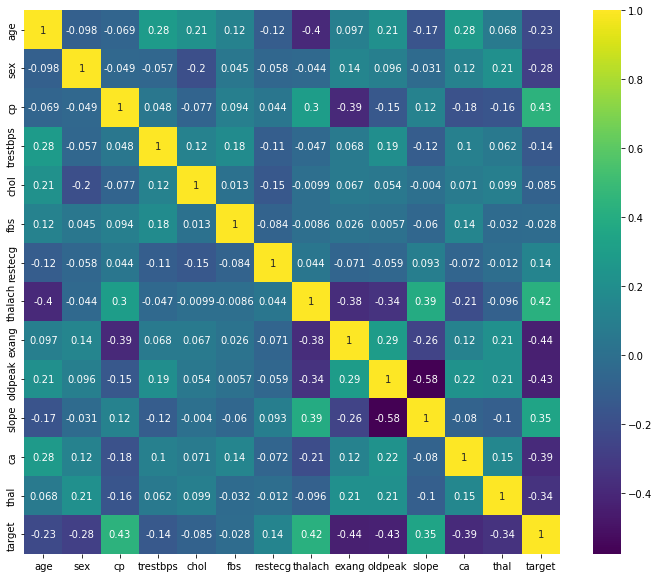

In [8]:
plt.figure(figsize=(12,10))

sns.heatmap(df.corr(), cmap='viridis', annot=True)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = df['target']
X = df.drop("target", axis=1)

In [11]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [12]:
X_train.shape

(272, 13)

In [13]:
X_test.shape

(31, 13)

In [14]:
y_train.shape

(272,)

In [15]:
y_test.shape

(31,)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
model  = LogisticRegression()

In [21]:
model.fit(scaled_X_train, y_train)

LogisticRegression()

In [22]:
pred = model.predict(scaled_X_test)

In [23]:
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score, classification_report

In [24]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))

[[12  3]
 [ 2 14]]


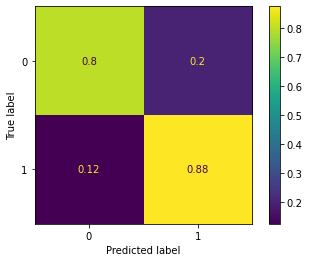

In [25]:
plot_confusion_matrix(model, scaled_X_test, y_test, normalize='true')

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



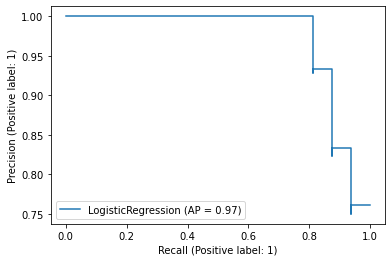

In [27]:
plot_precision_recall_curve(model, scaled_X_test, y_test)

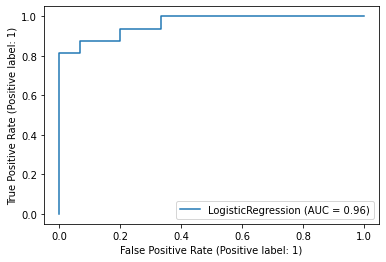

In [28]:
plot_roc_curve(model, scaled_X_test, y_test)

In [29]:
patient = [[ 64. ,   1. ,   2.0 , 125. , 309. ,   0. ,   1. , 132. ,   1. ,
          3.2,   1. ,   2. ,   2. ]]

In [30]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [31]:
y_test.iloc[-1]

0

In [32]:
model.predict(patient)

array([0], dtype=int64)

In [33]:
model.predict_proba(patient)

array([[1.00000000e+00, 4.72768648e-22]])